In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('..')
import prosumpy as pros


## Load example demand and photovoltaic profile

In [2]:
demand = pd.Series.from_csv('./tests/data/demand_example.csv')
pv_1kW = pd.Series.from_csv('./tests/data/pv_example.csv')

## Dispatch

We define some technical parameters needed for the dispatch

In [3]:
pv_size = 10

param_tech = {'BatteryCapacity': 30,
              'BatteryEfficiency': .9,
              'InverterEfficiency': 0.96,
              'timestep': .25,
              'MaxPower': 20
             }

pv = pv_1kW * pv_size

The photovoltaic and battery installation is covering the energy demand based on a given operation strategy. In this case the algorithm tries to maximize the self consumption.

In [4]:
E = pros.dispatch_max_sc(pv, demand, param_tech, return_series=False)


The solution is a dictionary that contains all energy flows:

In [5]:
E.keys()

['res_pv',
 'pv2inv',
 'LevelOfCharge',
 'inv2load',
 'pv2store',
 'store2inv',
 'grid2load',
 'inv2grid']

## Inspect results

We can have a quick overview on the results

In [6]:
pros.print_analysis(pv, demand, param_tech, E)

Total yearly consumption: 9.02e+03 kWh
Total PV production: 1.56e+04 kWh
Self Consumption: 8.38e+03 kWh
Total fed to the grid: 6.43e+03 kWh
Total bought from the grid: 640 kWh
Self consumption rate (SCR): 53.8%
Self sufficiency rate (SSR): 92.9%
Amount of energy provided by the battery: 5.24e+03 kWh
Average Charging/Discharging depth: 0.479
Number of equivalent full cycles per year: 175 
Total battery losses: 146 kWh
Total inverter losses: 617 kWh
Residue (check): -7.82e-11 kWh


We can inspect the dispatch by plotting the energy flows of any given week 

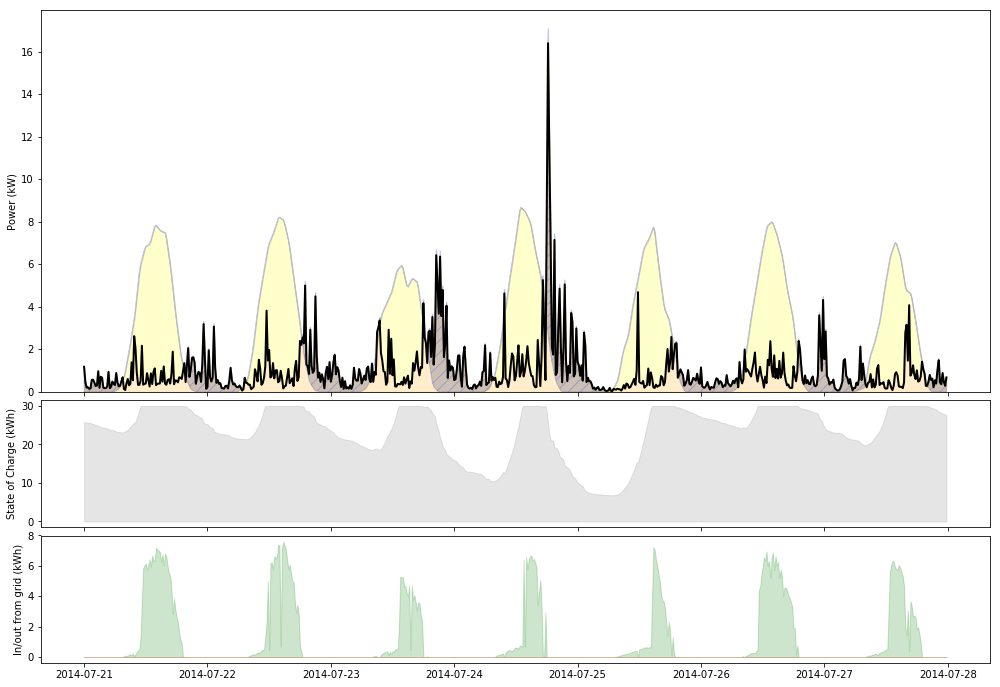

In [7]:
pros.plot_dispatch(pv, demand, E, week=30)